# Lab Segmentation 2

In [47]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Experiment 1: Automatic Thresholding

In [48]:
def histogram(img, bins=256):
  # NOTE: I used this to achieve the same result as skimage.exposure.histogram
  hist = np.zeros(bins)
  bin_centers = np.arange(bins)
  for i in range(bins):
    hist[i] = np.sum(img == i)
  return hist, bin_centers

In [155]:
def getThreshold(img: np.ndarray) -> int:
  img = img  .astype(np.uint8)
  hist, bin_centers = histogram(img)

  threshold = round(np.sum(hist * bin_centers) / np.sum(hist)) or 1
  
  while True:
    lower_count = np.sum(hist[:threshold])
    higher_count = np.sum(hist[threshold:])
    lower_t = np.sum(hist[:threshold] * bin_centers[:threshold]) / lower_count if lower_count else 0
    higher_t = np.sum(hist[threshold:] * bin_centers[threshold:]) / higher_count if higher_count else 0

    updated_threshold = round((lower_t + higher_t) / 2)
    
    if updated_threshold == threshold:
      break
    threshold = updated_threshold

  return threshold

In [156]:
def thresholdImage(img: np.ndarray, threshold: int) -> np.ndarray:
  return (img > threshold) * 255

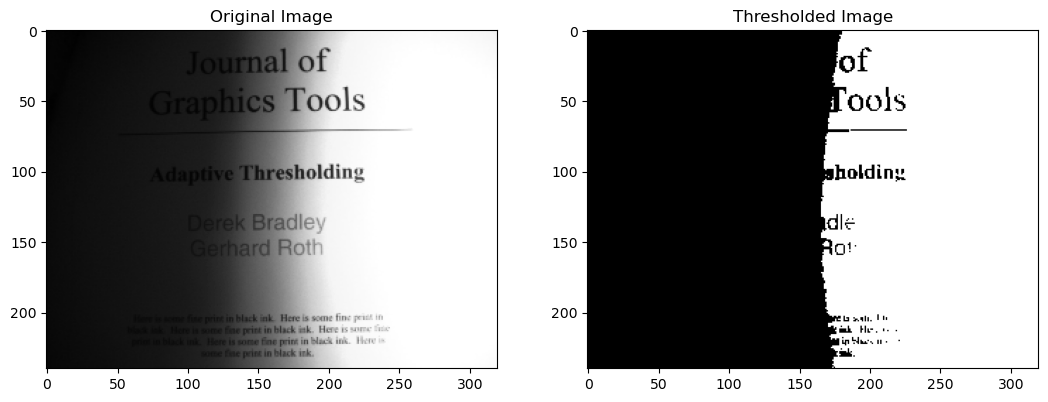

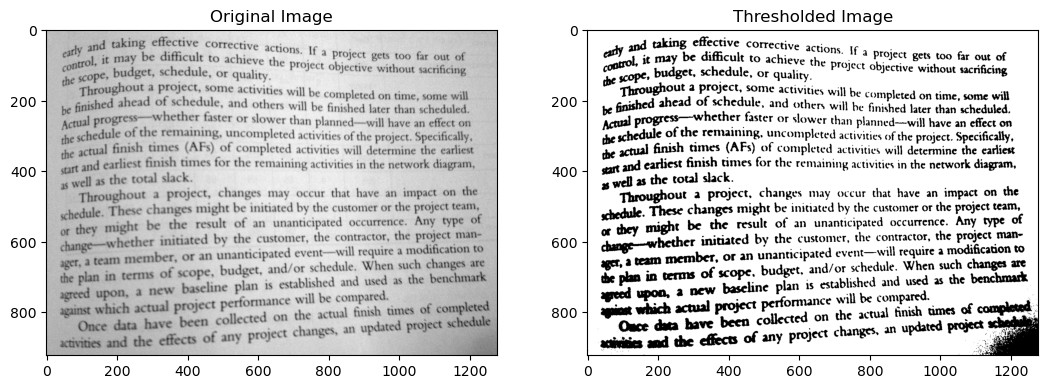

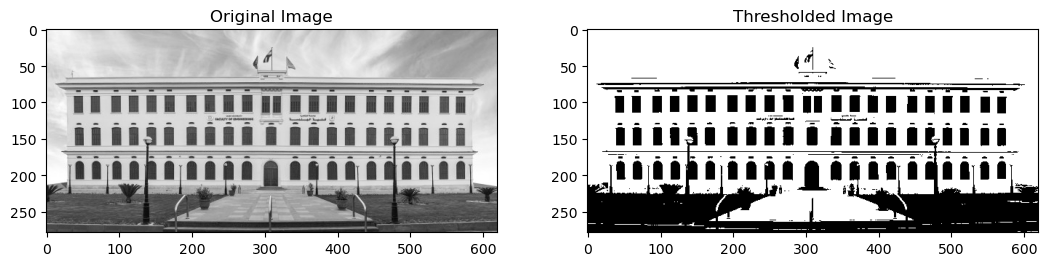

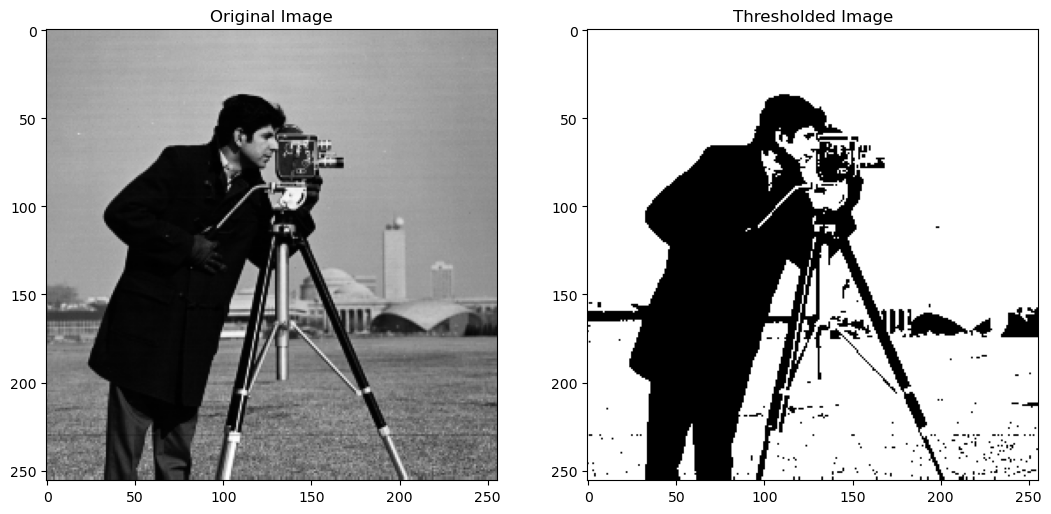

In [157]:
images_original = [
  io.imread('book.png', as_gray=True),
  io.imread('book1.png', as_gray=True) * 255,
  io.imread('cufe.png', as_gray=True)* 255,
  io.imread('cameraman.png', as_gray=True),
]

for image in images_original:
  threshold = getThreshold(image)
  thresholded_image = thresholdImage(image, threshold)
  show_images([image, thresholded_image], ['Original Image', 'Thresholded Image'])


## Experiment 2: Local Adaptive Thresholding

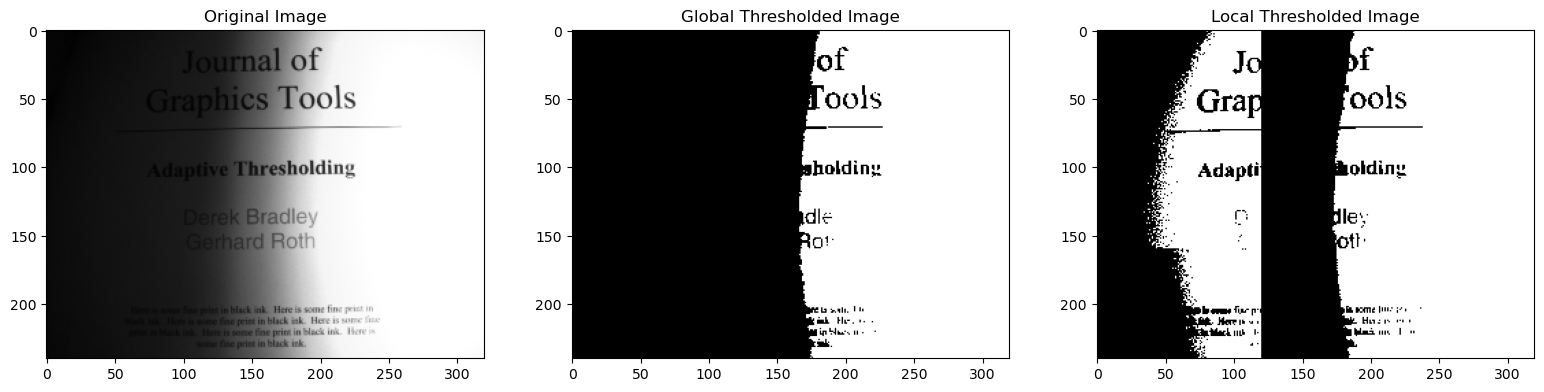

In [158]:
def localThreshold():
  book_image = io.imread('book.png', as_gray=True)
  book_image = book_image.astype(np.uint8)
  height, width = book_image.shape
  x_boundary_middle = height // 2
  y_boundary_middle = 160
  
  thresholded_image = np.zeros(book_image.shape, dtype=np.uint8)

  upper_left = thresholdImage(book_image[:y_boundary_middle, :x_boundary_middle], getThreshold(book_image[:y_boundary_middle, :x_boundary_middle]))
  upper_right = thresholdImage(book_image[:y_boundary_middle, x_boundary_middle:], getThreshold(book_image[:y_boundary_middle, x_boundary_middle:]))
  bottom_left = thresholdImage(book_image[y_boundary_middle:, :x_boundary_middle], getThreshold(book_image[y_boundary_middle:, :x_boundary_middle]))
  bottom_right = thresholdImage(book_image[y_boundary_middle:, x_boundary_middle:], getThreshold(book_image[y_boundary_middle:, x_boundary_middle:]))

  
  thresholded_image[:y_boundary_middle, :x_boundary_middle] = upper_left
  thresholded_image[:y_boundary_middle, x_boundary_middle:] = upper_right
  thresholded_image[y_boundary_middle:, :x_boundary_middle] = bottom_left
  thresholded_image[y_boundary_middle:, x_boundary_middle:] = bottom_right
  

  show_images([book_image, thresholdImage(book_image, getThreshold(book_image)), thresholded_image], ['Original Image', 'Global Thresholded Image', 'Local Thresholded Image'])

localThreshold()


## Experiment 3: Better local adaptive thresholding

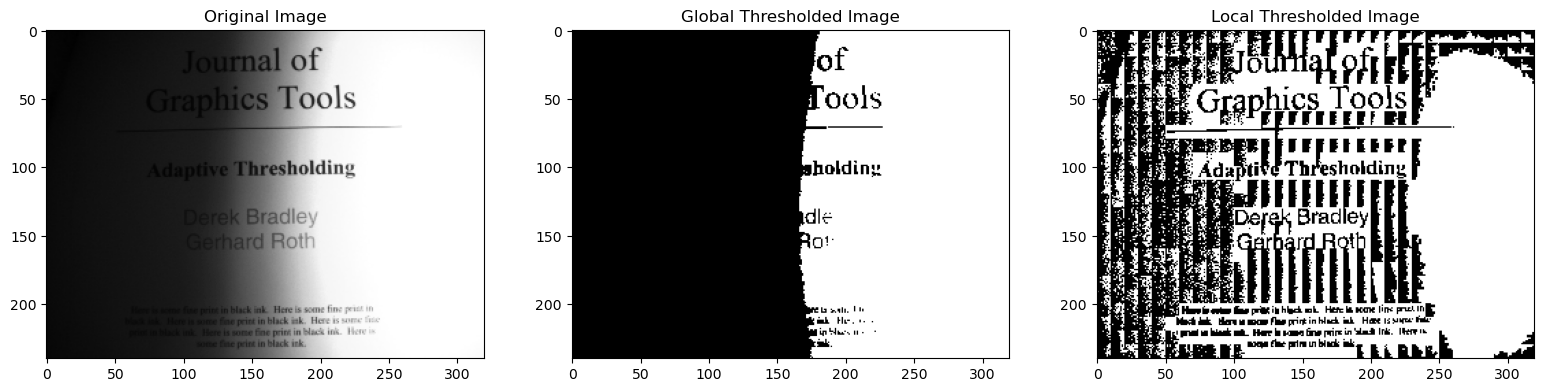

In [176]:

def localThreshold(image: np.ndarray, window_size: int) -> np.ndarray:
  image = image.astype(np.uint8)
  height, width = image.shape
  thresholded_image = np.zeros(image.shape, dtype=np.uint8)

  for i in range(0, height, window_size):
    for j in range(0, width, window_size):
      window = image[i:i+window_size, j:j+window_size]
      thresholded_image[i:i+window_size, j:j+window_size] = thresholdImage(window, getThreshold(window))

  return thresholded_image

book_image = io.imread('book.png', as_gray=True)

thresholded_image = localThreshold(book_image, 10)
show_images([book_image, thresholdImage(book_image, getThreshold(book_image)), thresholded_image], ['Original Image', 'Global Thresholded Image', 'Local Thresholded Image'])